In [1]:
pip install gymnasium


     -------------------------------------- 953.9/953.9 kB 6.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing the necessary libraries

In [2]:
import gymnasium
from gymnasium import spaces
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from operator import add
from math import sqrt

In [3]:
np.random.seed(123)

# Part 1: Creating the 2 Armed Bernoulli Bandit Environment in Gymnasium

In [5]:
class BernoulliBandit(gymnasium.Env):
  # Setting the metadata
  metadata = {"render_modes" : ["human", "rgb_array"], "render_fps": 4}
  def __init__(self, alpha, beta, seed = None):

    self.window_size = 512 # for rendering
    self.observation_space = spaces.Discrete(3) # 1 non-terminal state and 2 terminal states in bernoulli bandit
    self.action_space = spaces.Discrete(2) # two actions namely left and right
    self.alpha = alpha
    self.beta = beta
    self.size = 3
    self.window = None
    self.clock = None
    self.seed(seed)
    self.state = 0
    self.true_rewards = [self.np_random.binomial(n=1, p=self.alpha), self.np_random.binomial(n=1, p=self.beta)]

  def seed(self, seed=None):
    self.np_random, seed = gymnasium.utils.seeding.np_random(seed)
    return [seed]

  def reset(self, seed = None):
    self.seed(seed)
    self.state = 0
    return self.state

  def step(self, action):
        # Start with the assumption that the episode is done after this step
        done = True
        reward = 0
        # If we're in the starting state, the action determines the next state and reward
        if self.state == 0:
            if action == 0:
                # Action 0 (a0)
                self.state = 1 if self.np_random.random() < self.alpha else 2
                reward = 1 if self.state == 1 else 0
            else:
                # Action 1 (a1)
                self.state = 2 if self.np_random.random() < self.beta else 1
                reward = 1 if self.state == 2 else 0
        # No need for additional else, since in states 1 and 2, reward remains 0 and done remains True
        return self.state, reward, done, {}

def close(self):
      pass  # This method would handle any necessary cleanu


Simulating for alpha = 0, beta = 0
Episode: 1, Action: 0, State: 2, Reward: 0
Episode: 2, Action: 1, State: 1, Reward: 0
Episode: 3, Action: 0, State: 2, Reward: 0
Episode: 4, Action: 0, State: 2, Reward: 0
Episode: 5, Action: 1, State: 1, Reward: 0
Episode: 6, Action: 1, State: 1, Reward: 0
Episode: 7, Action: 1, State: 1, Reward: 0
Episode: 8, Action: 1, State: 1, Reward: 0
Episode: 9, Action: 0, State: 2, Reward: 0
Episode: 10, Action: 1, State: 1, Reward: 0


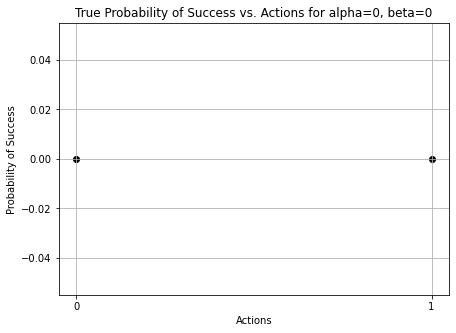

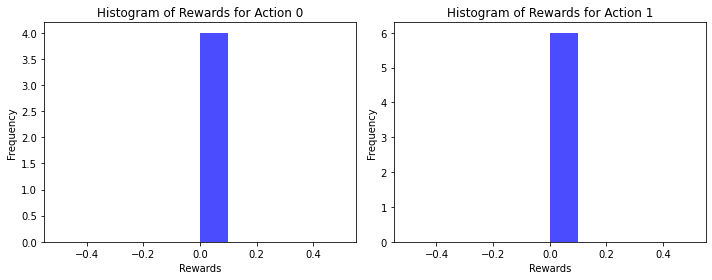


Simulating for alpha = 1, beta = 0
Episode: 1, Action: 0, State: 1, Reward: 1
Episode: 2, Action: 1, State: 1, Reward: 0
Episode: 3, Action: 0, State: 1, Reward: 1
Episode: 4, Action: 0, State: 1, Reward: 1
Episode: 5, Action: 1, State: 1, Reward: 0
Episode: 6, Action: 1, State: 1, Reward: 0
Episode: 7, Action: 1, State: 1, Reward: 0
Episode: 8, Action: 1, State: 1, Reward: 0
Episode: 9, Action: 0, State: 1, Reward: 1
Episode: 10, Action: 1, State: 1, Reward: 0


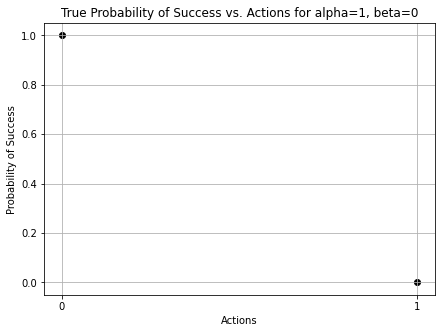

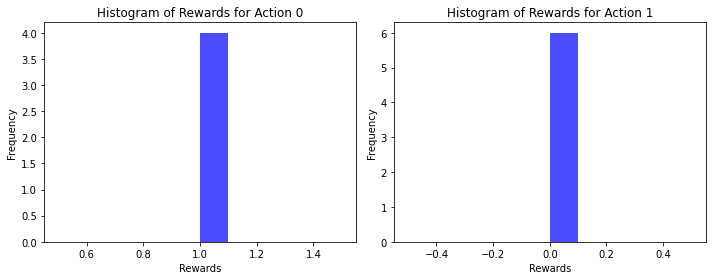


Simulating for alpha = 0, beta = 1
Episode: 1, Action: 0, State: 2, Reward: 0
Episode: 2, Action: 1, State: 2, Reward: 1
Episode: 3, Action: 0, State: 2, Reward: 0
Episode: 4, Action: 0, State: 2, Reward: 0
Episode: 5, Action: 1, State: 2, Reward: 1
Episode: 6, Action: 1, State: 2, Reward: 1
Episode: 7, Action: 1, State: 2, Reward: 1
Episode: 8, Action: 1, State: 2, Reward: 1
Episode: 9, Action: 0, State: 2, Reward: 0
Episode: 10, Action: 1, State: 2, Reward: 1


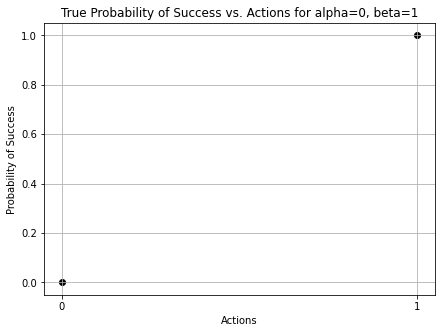

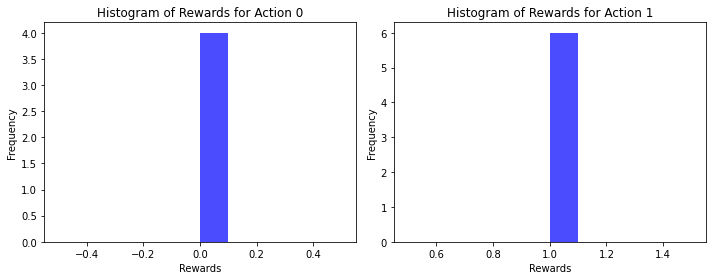


Simulating for alpha = 1, beta = 1
Episode: 1, Action: 0, State: 1, Reward: 1
Episode: 2, Action: 1, State: 2, Reward: 1
Episode: 3, Action: 0, State: 1, Reward: 1
Episode: 4, Action: 0, State: 1, Reward: 1
Episode: 5, Action: 1, State: 2, Reward: 1
Episode: 6, Action: 1, State: 2, Reward: 1
Episode: 7, Action: 1, State: 2, Reward: 1
Episode: 8, Action: 1, State: 2, Reward: 1
Episode: 9, Action: 0, State: 1, Reward: 1
Episode: 10, Action: 1, State: 2, Reward: 1


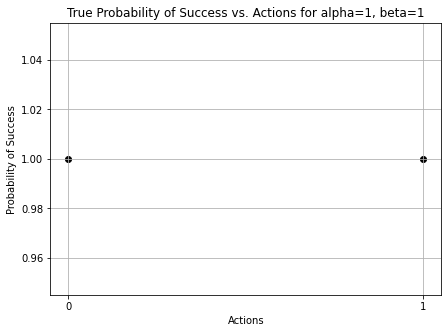

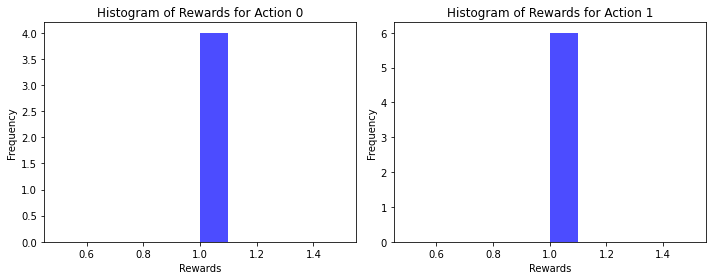


Simulating for alpha = 0.5, beta = 0.5
Episode: 1, Action: 0, State: 1, Reward: 1
Episode: 2, Action: 1, State: 1, Reward: 0
Episode: 3, Action: 0, State: 1, Reward: 1
Episode: 4, Action: 0, State: 2, Reward: 0
Episode: 5, Action: 1, State: 2, Reward: 1
Episode: 6, Action: 1, State: 2, Reward: 1
Episode: 7, Action: 1, State: 2, Reward: 1
Episode: 8, Action: 1, State: 2, Reward: 1
Episode: 9, Action: 0, State: 2, Reward: 0
Episode: 10, Action: 1, State: 1, Reward: 0


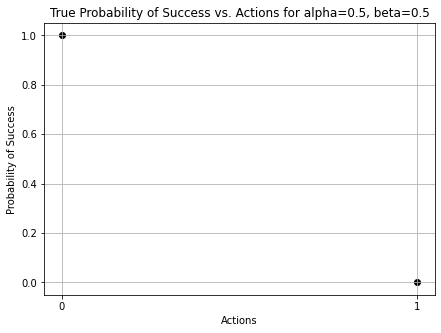

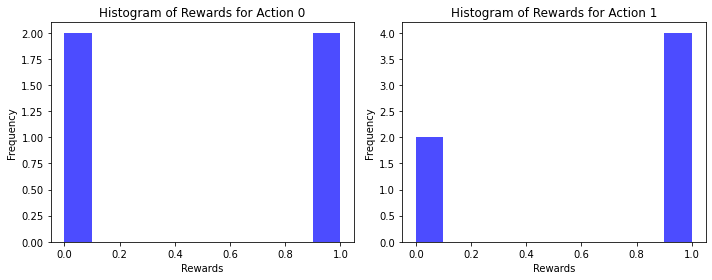

In [6]:
# Set the alpha and beta pairs for simulation
alphas_betas = [(0, 0), (1, 0), (0, 1), (1, 1), (0.5, 0.5)]
num_episodes = 10
global_seed = 123
# np.random.seed(global_seed)

# Iterate over each pair of alpha and beta
for alpha, beta in alphas_betas:
    print(f"\nSimulating for alpha = {alpha}, beta = {beta}")
    env = BernoulliBandit(alpha=alpha, beta=beta, seed=global_seed)
    actual_rewards = {a: [] for a in range(env.action_space.n)}  # Reset for each alpha-beta pair

    # Run a number of episodes for each pair of alpha and beta
    for episode in range(num_episodes):
        episode_seed = global_seed + episode
        state = env.reset(seed = episode_seed)
        done = False
        while not done:
            action = env.np_random.choice(env.action_space.n)  # Randomly choosing an action
            next_state, reward, done, _ = env.step(action)
            actual_rewards[action].append(reward)  # Correctly accumulate rewards
            print(f"Episode: {episode + 1}, Action: {action}, State: {next_state}, Reward: {reward}")

    # env.close()  # Close the environment

    # Plotting True Reward Probabilities for Each Action (after each alpha-beta simulation)
    plt.figure(figsize=(7, 5))
    actions = range(env.action_space.n)
    plt.scatter(actions, env.true_rewards, color="black")
    plt.grid(True)
    plt.xlabel("Actions")
    plt.ylabel("Probability of Success")
    plt.title(f"True Probability of Success vs. Actions for alpha={alpha}, beta={beta}")
    plt.xticks(actions)
    plt.show()

    # Plotting Histograms of Rewards for Each Action
    fig, axes = plt.subplots(nrows=1, ncols=env.action_space.n, figsize=(10, 4))

    for action in range(env.action_space.n):
        rewards = actual_rewards[action]
        ax = axes[action] if env.action_space.n > 1 else axes  # Adjust for single-action case
        ax.hist(rewards, bins=10, color='blue', alpha=0.7)
        ax.set_title(f'Histogram of Rewards for Action {action}')
        ax.set_xlabel('Rewards')
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()



# Part 2: Creating the Environment for 10 armed Gaussian Bandits using gymnasium

In [7]:
# Creating the environment for Gaussian Bandits
class GaussianBandit(gymnasium.Env):
  metadata = {"render_modes" : ["human", "rgb_array"], "render_fps": 4}
  def __init__(self, render = None, rewards_dist_params = [0,1], rewards_var = 1, seed = None):
    self.seed(seed)
    self.action_space = spaces.Discrete(10)
    self.observation_space = spaces.Discrete(11)
    self.state = 0
    self.window = None
    self.clock = None
    self.rewards_var = rewards_var
    self.rewards_dist_params = rewards_dist_params
    self.true_rewards = self.np_random.normal(loc = rewards_dist_params[0], scale = rewards_dist_params[1], size = self.observation_space.n - 1)

  # setting the seed for every environment registration
  def seed(self, seed=None):
    self.np_random, seed = gymnasium.utils.seeding.np_random(seed)
    return [seed]

  def reset(self, seed = None):
    self.seed(seed)
    self.state = 0
    return self.state

  def step(self, action):
      done = True
      # Using self.rewards_var to sample the reward
      rewards = self.np_random.normal(loc=self.true_rewards[action], scale=self.rewards_var)
      self.state = action + 1
      return self.state, rewards, done, {}

  def close(self):
    pass


Simulating for true_var = 1, var = 0
True Rewards for subsequent actions
[-0.98912135 -0.36778665  1.28792526  0.19397442  0.9202309   0.57710379
 -0.63646365  0.54195222 -0.31659545 -0.32238912]


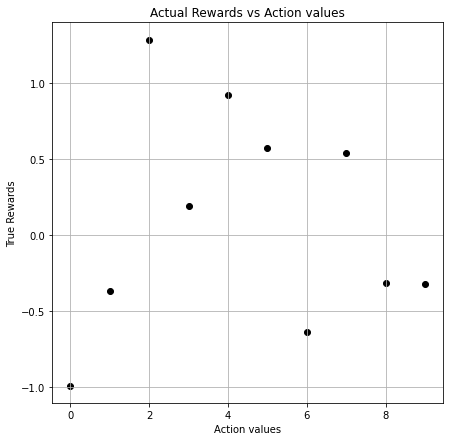

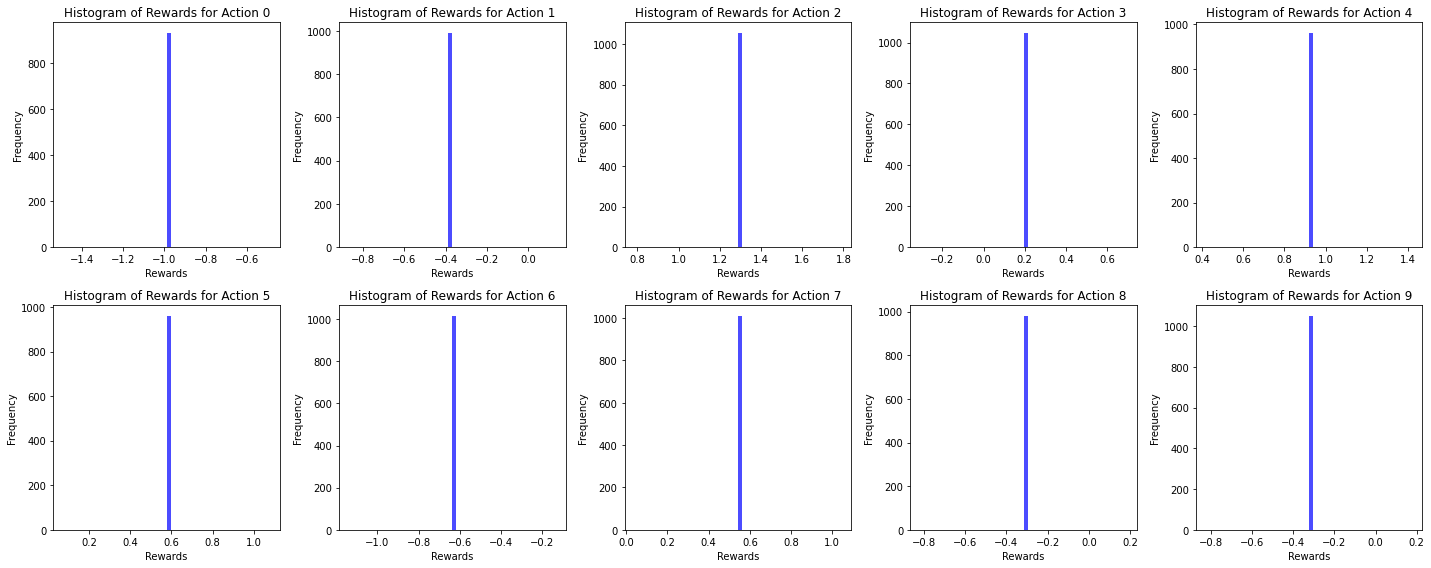

In [8]:
num_episodes = 10
global_seed = 123
numEpisodes = 10000
var = 0
true_var = 1
# Initiating the environment
print(f"\nSimulating for true_var = {true_var}, var = {var}")
env = GaussianBandit(rewards_dist_params = [0,true_var], rewards_var = var, seed = global_seed)
actual_rewards = {a : [] for a in range(0, env.action_space.n)}
print("True Rewards for subsequent actions")
print(env.true_rewards)

for episode in range(numEpisodes):
  episode_seed = global_seed + episode
  state = env.reset(seed = episode_seed)
  done = False
  while not done:
    action = env.np_random.choice(env.action_space.n) # Randomly choosing an action
    next_state, reward, done, _ = env.step(action)
    actual_rewards[action].append(reward)
    # print(f"Episode: {episode + 1}, Action: {action}, State: {next_state}, Reward: {reward}")

env.close()

# plotting the true values
plt.figure(figsize = (7, 7))
plt.scatter(range(0, env.action_space.n), env.true_rewards, color = "black")
plt.grid()
plt.xlabel("Action values")
plt.ylabel("True Rewards")
plt.title("Actual Rewards vs Action values")
plt.show()

num_actions = env.action_space.n
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()
for action in range(num_actions):
    rewards = actual_rewards[action]
    ax = axes[action]
    ax.hist(rewards, bins=50, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of Rewards for Action {action }')
    ax.set_xlabel('Rewards')
    ax.set_ylabel('Frequency')

# Layout settings for better spacing
plt.tight_layout()
plt.show()


# Part 3 (a): Implementing the `pureExploitation()` function

In [9]:
# Implementing the pureExploitation strategy
def pureExploitation(env, maxEpisodes, global_seed, action_ret = False):

  # storing the q values in Q and averaging over epsidoes
  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n) # stores the count of the corresponding actions

  # maintain two lists to store the rewards and actions
  actions, rewards = [], []

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(episode_seed)

    # choose the action with the max immediate reward
    action = np.argmax(Q)

    state, reward, done, _ = env.step(action)
    actions.append(action)
    rewards.append(reward)
    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q

  if action_ret == True:
    return actions, Q, Q_est, rewards
  else:
    return Q, Q_est, rewards

# Running this for Bernoulli Bandit

In [11]:
maxEpisodes = 20
global_seed = 123
action_ret = True
env = BernoulliBandit(alpha = 0.2, beta = 0., seed = global_seed)
actions, Q, Q_est, rewards = pureExploitation(env, maxEpisodes, global_seed = global_seed, action_ret = True)
print("Actions:  {}".format(actions))
print("Rewards : {}".format(rewards))
print("Q Estimated values for each action")
print(Q_est)

Actions:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Rewards : [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
Q Estimated values for each action
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.25       0.        ]
 [0.4        0.        ]
 [0.33333333 0.        ]
 [0.28571429 0.        ]
 [0.25       0.        ]
 [0.22222222 0.        ]
 [0.3        0.        ]
 [0.27272727 0.        ]
 [0.25       0.        ]
 [0.23076923 0.        ]
 [0.28571429 0.        ]
 [0.26666667 0.        ]
 [0.25       0.        ]
 [0.23529412 0.        ]
 [0.22222222 0.        ]
 [0.21052632 0.        ]
 [0.25       0.        ]]


# Running pureExploitation for Gaussian Bandit

In [12]:
maxEpisodes = 20
global_seed = 123
action_ret = True
env = GaussianBandit(rewards_dist_params = [0,1], rewards_var = 1, seed = global_seed)
actions, Q, Q_est, rewards = pureExploitation(env, maxEpisodes, global_seed = global_seed, action_ret = True)
print("Actions:  {}".format(actions))
print("Rewards : {}".format(rewards))
print("Q Estimated values for each action")
print(Q_est)

Actions:  [0, 1, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Rewards : [-1.9782427006957017, -0.6684107329960629, -1.2220522715188766, 0.26088579478483065, -1.417450668068105, 1.262751305173097, 0.959725587816583, 1.1551480722157301, 0.8501071192950558, 1.1953423806449386, -0.47912130054117585, 1.9779365816651766, 1.2498276941555133, 0.9594446924364379, 0.08035105125699638, -0.7510851870564217, 0.04792565288909534, -0.2558364069711643, -0.23154254849315992, 0.6087854932937211]
Q Estimated values for each action
[[-1.9782427   0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-1.9782427  -0.66841073  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-1.9782427  -0.66841073 -1.22205227  0.          0.          0.
   0.          0.          0.          0.        ]
 [-1.9782427  -0.66841073 -1.22205227  0.26088579  0.          0.
   0.          0.          0.          0.        ]
 [-1.

# Part 3(b): Implementing the `pureExploration()` strategy

In [13]:
# Implementing the pure exploration strategy
def pureExploration(env, maxEpisodes, global_seed, action_ret = False):

  # storing the q values in Q and averaging over epsidoes
  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n) # stores the count of the corresponding actions

  # maintain two lists to store the rewards and actions
  actions, rewards = [], []

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(episode_seed)

    # randomly choose an action from action space
    action = env.np_random.choice(env.action_space.n)

    state, reward, done, _ = env.step(action)
    actions.append(action)
    rewards.append(reward)
    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q # stores the averaged Q return for every episode

  if action_ret == True:
    return actions, Q, Q_est, rewards
  else:
    return Q, Q_est, rewards


In [14]:
maxEpisodes = 10
global_seed = 123
action_ret = True
env = BernoulliBandit(alpha = 0.2, beta = 0., seed = global_seed)
actions, Q, Q_est, rewards = pureExploration(env, maxEpisodes, global_seed = global_seed, action_ret = True)
print("Actions:  {}".format(actions))
print("Rewards : {}".format(rewards))
print("Q Estimated values for each action")
print(Q_est)

Actions:  [0, 1, 0, 0, 1, 1, 1, 1, 0, 1]
Rewards : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Q Estimated values for each action
[[1.         0.        ]
 [1.         0.        ]
 [0.5        0.        ]
 [0.33333333 0.        ]
 [0.33333333 0.        ]
 [0.33333333 0.        ]
 [0.33333333 0.        ]
 [0.33333333 0.        ]
 [0.25       0.        ]
 [0.25       0.        ]]


# Part 3(c): Implementing the `epsilonGreedyExploration()` function

In [15]:
# Implementing the epsilon and greedy strategy
def epsilonGreedyExploration(env, maxEpisodes, epsilon, global_seed, action_ret = False):

  # storing the q values in Q and averaging over epsidoes
  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n) # stores the count of the corresponding actions

  # maintain two lists to store the rewards and actions
  actions, rewards = [], []

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    if env.np_random.random() > epsilon:
      action = np.argmax(Q) # Exploitation
    else:
      action = env.np_random.choice(env.action_space.n) # Exploration

    state, reward, done, _ = env.step(action)
    actions.append(action)
    rewards.append(reward)
    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q

  if action_ret == True:
    return actions, Q, Q_est, rewards
  else:
    return Q, Q_est, rewards


In [16]:
maxEpisodes = 10
global_seed = 123
action_ret = True
env = BernoulliBandit(alpha = 0.2, beta = 0., seed = global_seed)
actions, Q, Q_est, rewards = epsilonGreedyExploration(env, maxEpisodes, epsilon = 0.2, global_seed = global_seed, action_ret = True)
print("Actions:  {}".format(actions))
print("Rewards : {}".format(rewards))
print("Q Estimated values for each action")
print(Q_est)

Actions:  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Rewards : [1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
Q Estimated values for each action
[[1.         0.        ]
 [0.5        0.        ]
 [0.33333333 0.        ]
 [0.5        0.        ]
 [0.5        0.        ]
 [0.4        0.        ]
 [0.33333333 0.        ]
 [0.42857143 0.        ]
 [0.375      0.        ]
 [0.33333333 0.        ]]


In [17]:
# Implementing a function for deacaying the step parameter
def decayEpsilon(initialValue, finalValue, maxSteps, decayType):

  # stpring the step params in a list
  epsilons = []

  if decayType == "linear":
   decay_rate = (finalValue - initialValue) / maxSteps
   for curr_step in range(maxSteps):
    curr_eps = initialValue + decay_rate * curr_step
    epsilons.append(curr_eps)

  elif decayType == "exponential":
    decay_rate = (np.log(finalValue/initialValue)) / maxSteps
    for curr_step in range(maxSteps):
      curr_eps = initialValue * np.exp(decay_rate * curr_step)
      epsilons.append(curr_eps)

  return epsilons

# Part 3(d): Epsilon Greedy with decaying ϵ using `decayEpsilonGreedyExploration()` function

In [18]:
# Implementing the decay epsilon and greedy strategy
def decayepsilonGreedyExploration(env, maxEpisodes, initialValue, finalValue, global_seed, decay_type, action_ret = False):

  # storing the q values in Q and averaging over epsidoes
  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n) # stores the count of the corresponding actions
  epsilons = decayEpsilon(initialValue, finalValue, maxEpisodes, decay_type)

  # maintain two lists to store the rewards and actions
  actions, rewards = [], []

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    if env.np_random.random() > epsilons[episode]:
      action = np.argmax(Q) # Exploitation
    else:
      action = env.np_random.choice(env.action_space.n) # Exploration

    state, reward, done, _ = env.step(action)
    actions.append(action)
    rewards.append(reward)
    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q

  if action_ret == True:
    return actions, Q, Q_est, rewards
  else:
    return Q, Q_est, rewards


# Linear decay

In [24]:
maxEpisodes = 10
global_seed = 123
action_ret = True
initialValue = 1
finalValue = 0
decay_type = "linear"
env = BernoulliBandit(alpha = 0.2, beta = 0., seed = global_seed)
actions, Q, Q_est, rewards = decayepsilonGreedyExploration(env, maxEpisodes, initialValue, finalValue, global_seed = global_seed, decay_type = decay_type, action_ret = True)
print("Actions:  {}".format(actions))
print("Rewards : {}".format(rewards))
print("Q Estimated values for each action")
print(Q_est)

Actions:  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
Rewards : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
Q Estimated values for each action
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.5        0.        ]
 [0.5        0.        ]
 [0.33333333 0.        ]
 [0.25       0.        ]
 [0.4        0.        ]
 [0.33333333 0.        ]
 [0.28571429 0.        ]]


# Exponential Decay

In [26]:
maxEpisodes = 10
global_seed = 123
action_ret = True
initialValue = 1
finalValue = 0.01
decay_type = "exponential"
env = BernoulliBandit(alpha = 0.2, beta = 0., seed = global_seed)
actions, Q, Q_est, rewards = decayepsilonGreedyExploration(env, maxEpisodes, initialValue, finalValue, global_seed = global_seed, decay_type = decay_type, action_ret = True)
print("Actions:  {}".format(actions))
print("Rewards : {}".format(rewards))
print("Q Estimated values for each action")
print(Q_est)

Actions:  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Rewards : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
Q Estimated values for each action
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.33333333 0.        ]
 [0.33333333 0.        ]
 [0.25       0.        ]
 [0.2        0.        ]
 [0.33333333 0.        ]
 [0.28571429 0.        ]
 [0.25       0.        ]]


# Part 3(e): Implementing the softmax strategy with decaying temperature using the `softmaxExploration()` function


In [27]:
# Implementing the softmax function
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

# Implementing the softmax exploration strategy
def softmaxExploration(env, maxEpisodes, intialValue, finalValue, global_seed, decay_type, action_ret = True):

  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n)
  temperatures = decayEpsilon(initialValue, finalValue, maxEpisodes, decay_type)

  # maintain two lists to store the rewards and actions
  actions, rewards = [], []

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    # calculating he softmax probabilities
    probs = softmax(Q / temperatures[episode])
    action = env.np_random.choice(env.action_space.n, 1, p = probs)
    next_state, reward, done, _ = env.step(action)
    actions.append(int(action))
    rewards.append(reward)

    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q

  if action_ret == True:
    return actions, Q, Q_est, rewards
  else:
    return Q, Q_est, rewards

In [28]:
maxEpisodes = 10
global_seed = 123
action_ret = True
initialValue = 100
finalValue = 0.01
env = BernoulliBandit(alpha = 0.2, beta = 0., seed = global_seed)
actions, Q, Q_est, rewards = softmaxExploration(env, maxEpisodes, initialValue, finalValue, global_seed = global_seed, decay_type = "exponential", action_ret = True)
print("Actions:  {}".format(actions))
print("Rewards : {}".format(rewards))
print("Q Estimated values for each action")
print(Q_est)

Actions:  [1, 1, 1, 0, 0, 1, 0, 0, 0, 0]
Rewards : [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Q Estimated values for each action
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.25       0.        ]
 [0.2        0.        ]
 [0.16666667 0.        ]]


# Part 3(f): Implementing the Upper Confidence Bound (UCB) using `UCBexploration()` function

In [29]:
# Implementing the softmax exploration strategy
def UCBExploration(env, maxEpisodes, c, global_seed, action_ret = True):

  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n)

  # maintain two lists to store the rewards and actions
  actions, rewards = [], []

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    if episode < len(Q):
      action = episode
    else:
      U = c*np.sqrt(np.log(episode)/N)
      action = np.argmax(Q + U)

    next_state, reward, done, _ = env.step(action)
    actions.append(int(action))
    rewards.append(reward)

    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q

  if action_ret == True:
    return actions, Q, Q_est, rewards
  else:
    return Q, Q_est, rewards

In [30]:
maxEpisodes = 10
global_seed = 123
action_ret = True
initialValue = 100
finalValue = 0.01
env = BernoulliBandit(alpha = 0.2, beta = 0., seed = global_seed)
actions, Q, Q_est, rewards = UCBExploration(env, maxEpisodes, c = 0.2, global_seed = global_seed, action_ret = True)
print("Actions:  {}".format(actions))
print("Rewards : {}".format(rewards))
print("Q Estimated values for each action")
print(Q_est)

Actions:  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
Rewards : [0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
Q Estimated values for each action
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.33333333 0.        ]
 [0.25       0.        ]
 [0.2        0.        ]
 [0.16666667 0.        ]
 [0.14285714 0.        ]
 [0.25       0.        ]]


# Part 4: Running 50 different instances of the Bernoulli Bandit for average rewards vs episodes for 6 different exploration strategies

In [31]:
from random import seed
global_seed = 123
np.random.seed(123)
bernoulli_params = np.random.rand(50,2)
maxEpisodes = 1000
initialValue = 1
finalValue = 0.01
c = 0.5
epsilon = 0.2
decay_type = "exponential"
master_rewards = []

for idx, params in enumerate(bernoulli_params):
  total_rewards = []
  # print(params)
  global_seed = global_seed + idx
  env = BernoulliBandit(alpha = params[0], beta = params[1], seed = global_seed)

  # pure exploitation
  actions_exploit, Q_exploit, Q_est_exploit, rewards_exploit = pureExploitation(env, maxEpisodes, global_seed = global_seed, action_ret = True)
  total_rewards.append(rewards_exploit)

  # pure exploration
  actions_explore, Q_explore, Q_est_explore, rewards_explore = pureExploration(env, maxEpisodes, global_seed = global_seed, action_ret = True)
  total_rewards.append(rewards_explore)

  # epsilon greedy
  actions_eps, Q_eps, Q_est_eps, rewards_eps = epsilonGreedyExploration(env, maxEpisodes, epsilon, global_seed = global_seed, action_ret = True)
  total_rewards.append(rewards_eps)

  # decaying epsilon greedy
  actions_decay_eps, Q_decay_eps, Q_est_decay_eps, rewards_decay_eps = decayepsilonGreedyExploration(env, maxEpisodes, initialValue, finalValue, global_seed = global_seed, decay_type = "exponential", action_ret = True)
  total_rewards.append(rewards_decay_eps)

  # softmax exploration
  actions_sft, Q_sft, Q_est_sft, rewards_sft = softmaxExploration(env, maxEpisodes, 100, finalValue, global_seed = global_seed, decay_type = "exponential", action_ret = True)
  total_rewards.append(rewards_sft)

  # UCB exploration
  actions_ucb, Q_ucb, Q_est_ucb, rewards_ucb =  UCBExploration(env, maxEpisodes, c, global_seed = global_seed, action_ret = True)
  total_rewards.append(rewards_ucb)

  master_rewards.append(total_rewards)

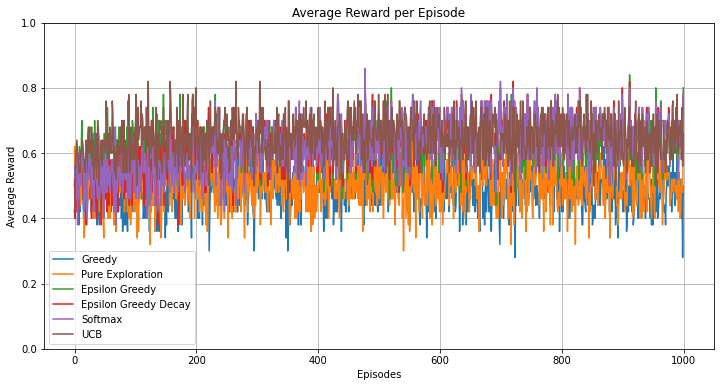

In [32]:
## Reorganizing
master_rewards_array = np.array(master_rewards)
master_rewards_array.shape
averaged_rewards = np.mean(master_rewards_array, axis = 0)

x_values = np.arange(1000)

plt.figure(figsize=(12, 6))

for i in range(averaged_rewards.shape[0]):
    plt.plot(x_values, averaged_rewards[i], label=f'Series {i+1}')

legend_entries = ['Greedy', 'Pure Exploration', 'Epsilon Greedy', 'Epsilon Greedy Decay', 'Softmax', 'UCB']

# Add labels and title
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')

# Add legend
plt.legend(legend_entries)
plt.grid(True)
plt.ylim([0,1])

# Show the plot
plt.show()


# Plotting Average rewards vs episode for different epsilon values in epsilon greedy exploration strategy

In [33]:

global_seed = 123
np.random.seed(global_seed)
bernoulli_params = np.random.rand(50,2)
maxEpisodes = 1000
master_rewards = []
c = [0.2, 0.3, 0.4, 0.5]

for idx, params in enumerate(bernoulli_params):
  total_rewards = []
  # print(params)
  global_seed = global_seed + idx
  env = BernoulliBandit(alpha = params[0], beta = params[1], seed = global_seed)

  # epsilon greedy
  for eps in c:
    actions_eps, Q_eps, Q_est_eps, rewards_eps = epsilonGreedyExploration(env, maxEpisodes, eps, global_seed = global_seed, action_ret = True)
    total_rewards.append(rewards_eps)

  master_rewards.append(total_rewards)

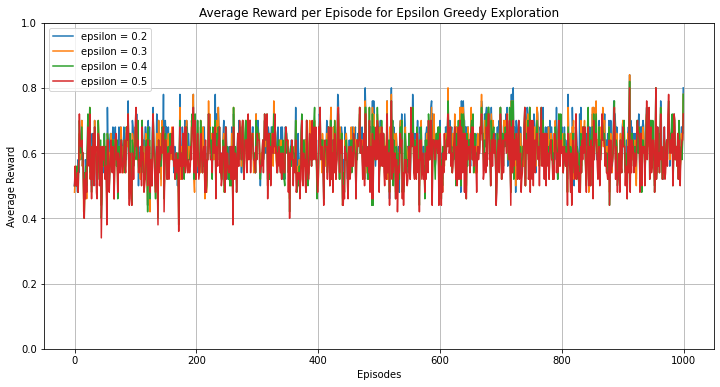

In [34]:
## Reorganizing
master_rewards_array = np.array(master_rewards)
master_rewards_array.shape
averaged_rewards = np.mean(master_rewards_array, axis = 0)

x_values = np.arange(1000)

plt.figure(figsize=(12, 6))

for i in range(averaged_rewards.shape[0]):
    plt.plot(x_values, averaged_rewards[i], label=f'Series {i+1}')

legend_entries = ["epsilon = {}".format(c[0]), "epsilon = {}".format(c[1]), "epsilon = {}".format(c[2]), "epsilon = {}".format(c[3])]

# Add labels and title
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for Epsilon Greedy Exploration')

# Add legend
plt.legend(legend_entries)
plt.grid(True)
plt.ylim([0,1])

# plt.plot(c, np.mean(averaged_rewards, axis = 0))
# Show the plot
plt.show()


[0.2, 0.3, 0.4, 0.5]
[0.62456 0.6116  0.6029  0.58954]


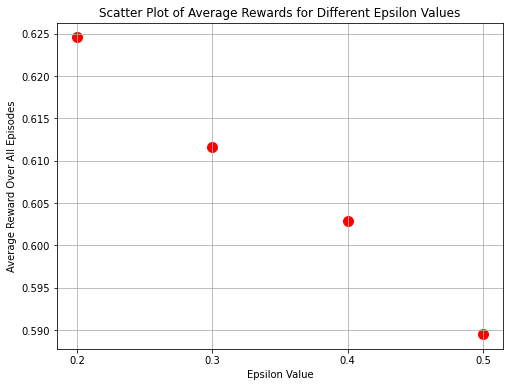

In [35]:
# Calculate averaged rewards across episodes for each series
averaged_rewards_over_all_episodes = np.mean(averaged_rewards, axis=1)

averaged_rewards_over_all_episodes

plt.figure(figsize=(8, 6))
print(c)
print(averaged_rewards_over_all_episodes)
# Plotting epsilon values against their averaged rewards
plt.scatter(c, averaged_rewards_over_all_episodes, color='red', s=100)  # 's' sets the marker size

plt.xlabel('Epsilon Value')
plt.ylabel('Average Reward Over All Episodes')
plt.title('Scatter Plot of Average Rewards for Different Epsilon Values')
plt.xticks(c, [f'{e}' for e in c])
plt.grid(True)

# Show the plot
plt.show()


## Plotting Average Rewards vs Episodes for different c values in UCB exploration

In [36]:

global_seed = 123
np.random.seed(global_seed)
bernoulli_params = np.random.rand(50,2)
maxEpisodes = 1000
master_rewards = []
c = [0.1, 0.3, 0.5, 0.8]

for idx, params in enumerate(bernoulli_params):
  total_rewards = []
  # print(params)
  global_seed = global_seed + idx
  env = BernoulliBandit(alpha = params[0], beta = params[1], seed = global_seed)

  # epsilon greedy
  for eps in c:
    actions_eps, Q_eps, Q_est_eps, rewards_eps =  UCBExploration(env, maxEpisodes, eps, global_seed = global_seed, action_ret = True)
    total_rewards.append(rewards_eps)

  master_rewards.append(total_rewards)

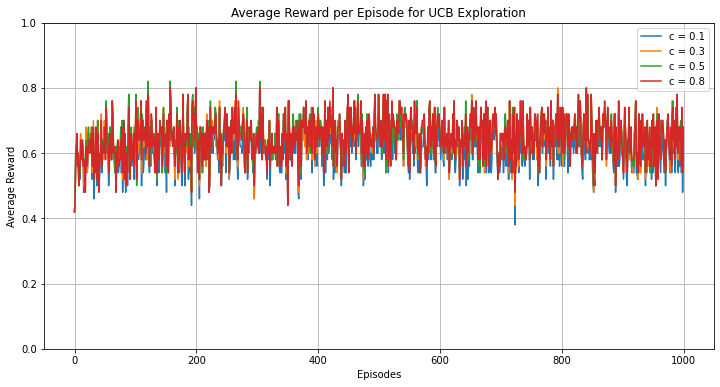

In [39]:
## Reorganizing
master_rewards_array = np.array(master_rewards)
master_rewards_array.shape
averaged_rewards = np.mean(master_rewards_array, axis = 0)

x_values = np.arange(1000)

plt.figure(figsize=(12, 6))

for i in range(averaged_rewards.shape[0]):
    plt.plot(x_values, averaged_rewards[i], label=f'Series {i+1}')

legend_entries = ["c = {}".format(c[0]), "c = {}".format(c[1]), "c = {}".format(c[2]), "c = {}".format(c[3])]

# Add labels and title
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for UCB Exploration')

# Add legend
plt.legend(legend_entries)
plt.grid(True)
plt.ylim([0,1])

plt.plot()
# Show the plot
plt.show()


[0.1, 0.3, 0.5, 0.8]
[0.6156  0.64334 0.64866 0.64604]


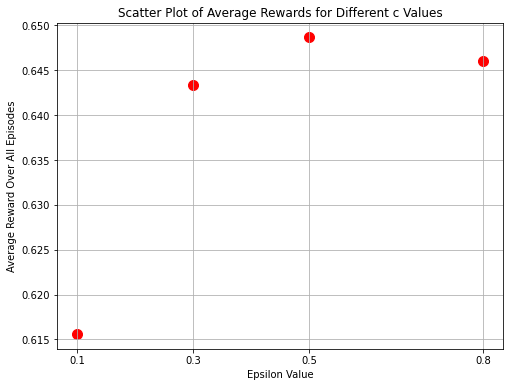

In [40]:
# Calculate averaged rewards across episodes for each series
averaged_rewards_over_all_episodes = np.mean(averaged_rewards, axis=1)

averaged_rewards_over_all_episodes

plt.figure(figsize=(8, 6))
print(c)
print(averaged_rewards_over_all_episodes)
# Plotting epsilon values against their averaged rewards
plt.scatter(c, averaged_rewards_over_all_episodes, color='red', s=100)  # 's' sets the marker size

plt.xlabel('Epsilon Value')
plt.ylabel('Average Reward Over All Episodes')
plt.title('Scatter Plot of Average Rewards for Different c Values')
plt.xticks(c, [f'{e}' for e in c])
plt.grid(True)

# Show the plot
plt.show()


# Plotting Average Rewards vs Episodes for the case of Gaussian Bandit

In [41]:
from random import seed
global_seed = 123
np.random.seed(123)
bernoulli_params = np.random.rand(50,2)
maxEpisodes = 1000
initialValue = 1
finalValue = 0.1
c = 0.3
epsilon = 0.2
var = 1
decay_type = "exponential"
master_rewards = []

for idx in range(50):
  total_rewards = []
  # print(params)
  global_seed = global_seed + idx
  env = GaussianBandit(rewards_dist_params = [0,var], rewards_var = var, seed = global_seed)

  # pure exploitation
  actions_exploit, Q_exploit, Q_est_exploit, rewards_exploit = pureExploitation(env, maxEpisodes, global_seed = global_seed, action_ret = True)
  total_rewards.append(rewards_exploit)

  # pure exploration
  actions_explore, Q_explore, Q_est_explore, rewards_explore = pureExploration(env, maxEpisodes, global_seed = global_seed, action_ret = True)
  total_rewards.append(rewards_explore)

  # epsilon greedy
  actions_eps, Q_eps, Q_est_eps, rewards_eps = epsilonGreedyExploration(env, maxEpisodes, epsilon, global_seed = global_seed, action_ret = True)
  total_rewards.append(rewards_eps)

  # decaying epsilon greedy
  actions_decay_eps, Q_decay_eps, Q_est_decay_eps, rewards_decay_eps = decayepsilonGreedyExploration(env, maxEpisodes, initialValue, finalValue, global_seed = global_seed, decay_type = "exponential", action_ret = True)
  total_rewards.append(rewards_decay_eps)

  # softmax exploration
  actions_sft, Q_sft, Q_est_sft, rewards_sft = softmaxExploration(env, maxEpisodes, 10, finalValue, global_seed = global_seed, decay_type = "exponential", action_ret = True)
  total_rewards.append(rewards_sft)

  # UCB exploration
  actions_ucb, Q_ucb, Q_est_ucb, rewards_ucb =  UCBExploration(env, maxEpisodes, c, global_seed = global_seed, action_ret = True)
  total_rewards.append(rewards_ucb)

  master_rewards.append(total_rewards)

C:\Users\User\AppData\Local\Temp/ipykernel_2300/3079894901.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  master_rewards_array = np.array(master_rewards)


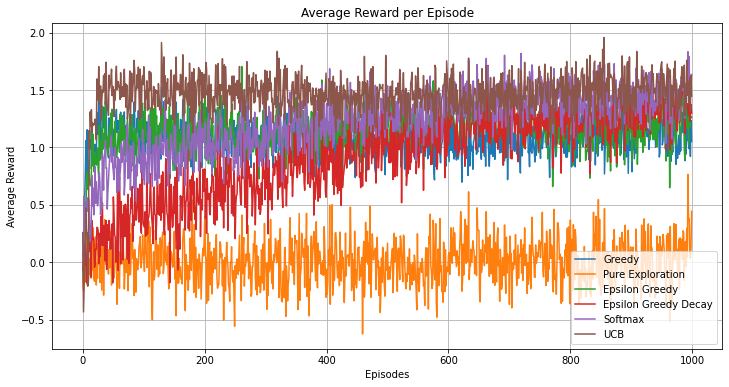

In [42]:
## Reorganizing
master_rewards_array = np.array(master_rewards)
master_rewards_array.shape
averaged_rewards = np.mean(master_rewards_array, axis = 0)

x_values = np.arange(1000)

plt.figure(figsize=(12, 6))

for i in range(averaged_rewards.shape[0]):
    plt.plot(x_values, averaged_rewards[i], label=f'Series {i+1}')

legend_entries = ['Greedy', 'Pure Exploration', 'Epsilon Greedy', 'Epsilon Greedy Decay', 'Softmax', 'UCB']

# Add labels and title
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')

# Add legend
plt.legend(legend_entries)
plt.grid(True)
# plt.ylim([0,1])

# Show the plot
plt.show()


# Plotting the average rewards vs Episodes for different ϵ values in the case of 10 - armed Gaussian Bandit

In [43]:

global_seed = 123
np.random.seed(global_seed)
bernoulli_params = np.random.rand(50,2)
maxEpisodes = 1000
master_rewards = []
c = [0.1, 0.3, 0.5, 0.8]

for idx in range(50):
  total_rewards = []
  # print(params)
  global_seed = global_seed + idx
  env = GaussianBandit(rewards_dist_params = [0,var], rewards_var = var, seed = global_seed)

  # epsilon greedy
  for eps in c:
    actions_eps, Q_eps, Q_est_eps, rewards_eps =  UCBExploration(env, maxEpisodes, eps, global_seed = global_seed, action_ret = True)
    total_rewards.append(rewards_eps)

  master_rewards.append(total_rewards)

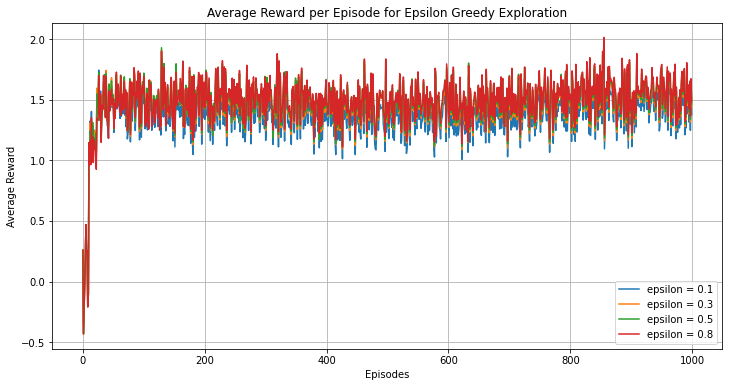

In [44]:
## Reorganizing
master_rewards_array = np.array(master_rewards)
master_rewards_array.shape
averaged_rewards = np.mean(master_rewards_array, axis = 0)

x_values = np.arange(1000)

plt.figure(figsize=(12, 6))

for i in range(averaged_rewards.shape[0]):
    plt.plot(x_values, averaged_rewards[i], label=f'Series {i+1}')

legend_entries = ["epsilon = {}".format(c[0]), "epsilon = {}".format(c[1]), "epsilon = {}".format(c[2]), "epsilon = {}".format(c[3])]

# Add labels and title
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for Epsilon Greedy Exploration')

# Add legend
plt.legend(legend_entries)
plt.grid(True)
# plt.ylim([0,1])

# plt.plot(c, np.mean(averaged_rewards, axis = 0))
# Show the plot
plt.show()


[0.1, 0.3, 0.5, 0.8]
[1.38274728 1.4559765  1.47257451 1.48314206]


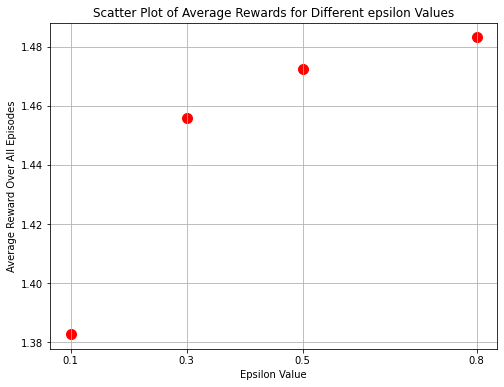

In [45]:
# Calculate averaged rewards across episodes for each series
averaged_rewards_over_all_episodes = np.mean(averaged_rewards, axis=1)

averaged_rewards_over_all_episodes

plt.figure(figsize=(8, 6))
print(c)
print(averaged_rewards_over_all_episodes)
# Plotting epsilon values against their averaged rewards
plt.scatter(c, averaged_rewards_over_all_episodes, color='red', s=100)  # 's' sets the marker size

plt.xlabel('Epsilon Value')
plt.ylabel('Average Reward Over All Episodes')
plt.title('Scatter Plot of Average Rewards for Different epsilon Values')
plt.xticks(c, [f'{e}' for e in c])
plt.grid(True)

# Show the plot
plt.show()


# Plotting Average Rewards vs Epsiodes for different c values in UCB exploration for the case of Gaussian Bandit

In [46]:

global_seed = 123
np.random.seed(global_seed)
bernoulli_params = np.random.rand(50,2)
maxEpisodes = 1000
master_rewards = []
c = [0.2, 0.01, 0.9, 0.001]

for idx in range(50):
  total_rewards = []
  # print(params)
  global_seed = global_seed + idx
  env = GaussianBandit(rewards_dist_params = [0,var], rewards_var = var, seed = global_seed)

  # epsilon greedy
  for eps in c:
    actions_eps, Q_eps, Q_est_eps, rewards_eps =  UCBExploration(env, maxEpisodes, eps, global_seed = global_seed, action_ret = True)
    total_rewards.append(rewards_eps)

  master_rewards.append(total_rewards)

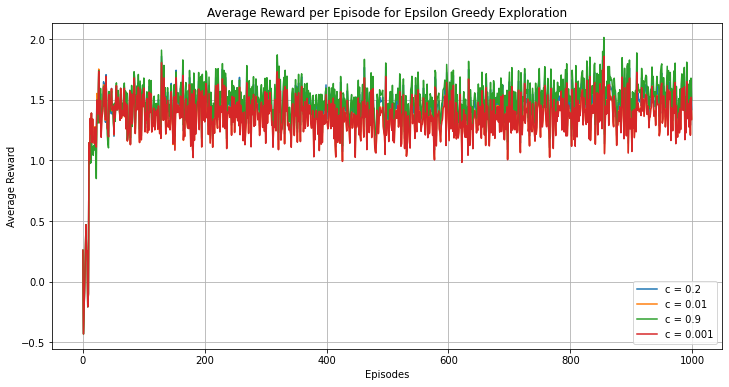

In [48]:
## Reorganizing
master_rewards_array = np.array(master_rewards)
master_rewards_array.shape
averaged_rewards = np.mean(master_rewards_array, axis = 0)

x_values = np.arange(1000)

plt.figure(figsize=(12, 6))

for i in range(averaged_rewards.shape[0]):
    plt.plot(x_values, averaged_rewards[i], label=f'Series {i+1}')

legend_entries = ["c = {}".format(c[0]), "c = {}".format(c[1]), "c = {}".format(c[2]), "c = {}".format(c[3])]

# Add labels and title
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for Epsilon Greedy Exploration')

# Add legend
plt.legend(legend_entries)
plt.grid(True)
# plt.ylim([0,1])

# plt.plot(c, np.mean(averaged_rewards, axis = 0))
# Show the plot
plt.show()


[0.2, 0.01, 0.9, 0.001]
[1.42772852 1.36077567 1.47936    1.35620186]


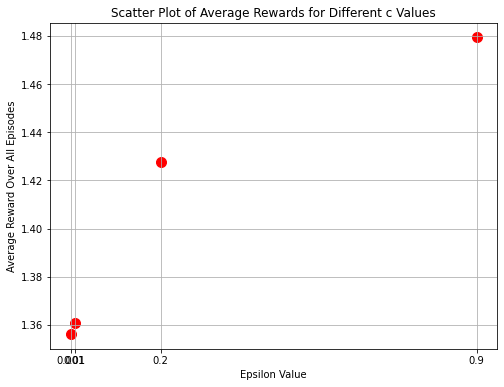

In [49]:
# Calculate averaged rewards across episodes for each series
averaged_rewards_over_all_episodes = np.mean(averaged_rewards, axis=1)

averaged_rewards_over_all_episodes

plt.figure(figsize=(8, 6))
print(c)
print(averaged_rewards_over_all_episodes)
# Plotting epsilon values against their averaged rewards
plt.scatter(c, averaged_rewards_over_all_episodes, color='red', s=100)  # 's' sets the marker size

plt.xlabel('Epsilon Value')
plt.ylabel('Average Reward Over All Episodes')
plt.title('Scatter Plot of Average Rewards for Different c Values')
plt.xticks(c, [f'{e}' for e in c])
plt.grid(True)

# Show the plot
plt.show()


# Modified function for obtaining `Accumulated Regret` and `% Optimal Actions` for all the strategies in the case of Gaussian Bandit and Bernoulli Bandit

In [51]:
# Implementing the pureExploitation strategy
def pureExploitation_modified(env, maxEpisodes, global_seed, action_ret = False):

  # storing the q values in Q and averaging over epsidoes
  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n) # stores the count of the corresponding actions
  optimal_action_count = np.zeros(maxEpisodes)  # Tracks if optimal action was taken
  optimal_action = np.argmax(env.true_rewards)
  # maintain two lists to store the rewards and actions
  actions, rewards, regrets = [], [], []

  # obtain the max value
  v_star = np.max(env.true_rewards)

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(episode_seed)

    # choose the action with the max immediate reward
    action = np.argmax(Q)
    if action == optimal_action:
      optimal_action_count[episode] = 1

    state, reward, done, _ = env.step(action)
    actions.append(action)
    rewards.append(reward)
    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q

    # calculating regret
    regret = v_star - env.true_rewards[int(action)]
    regrets.append(regret if episode == 0 else regrets[-1] + regret)  # Cumulative regret

  optimal_action_pct = np.cumsum(optimal_action_count) / (np.arange(maxEpisodes) + 1)

  if action_ret == True:
    return actions, Q, Q_est, rewards, regrets, optimal_action_pct
  else:
    return Q, Q_est, rewards, regrets, optimal_action_pct

# Pure exploration
# Implementing the pure exploration strategy
def pureExploration_modified(env, maxEpisodes, global_seed, action_ret = False):

  # storing the q values in Q and averaging over epsidoes
  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n) # stores the count of the corresponding actions
  optimal_action_count = np.zeros(maxEpisodes)  # Tracks if optimal action was taken
  optimal_action = np.argmax(env.true_rewards)
  # maintain two lists to store the rewards and actions
  actions, rewards, regrets = [], [], []

  # obtain the max value
  v_star = np.max(env.true_rewards)

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(episode_seed)

    # randomly choose an action from action space
    action = env.np_random.choice(env.action_space.n)
    if action == optimal_action:
      optimal_action_count[episode] = 1

    state, reward, done, _ = env.step(action)
    actions.append(action)
    rewards.append(reward)
    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q # stores the averaged Q return for every episode
    # calculating regret
    regret = v_star - env.true_rewards[action]
    regrets.append(regret if episode == 0 else regrets[-1] + regret)  # Cumulative regret

  optimal_action_pct = np.cumsum(optimal_action_count) / (np.arange(maxEpisodes) + 1)

  if action_ret == True:
    return actions, Q, Q_est, rewards, regrets, optimal_action_pct
  else:
    return Q, Q_est, rewards, regrets, optimal_action_pct

# epsilon greedy strategy
# Implementing the epsilon and greedy strategy
def epsilonGreedyExploration_modified(env, maxEpisodes, epsilon, global_seed, action_ret = False):

  # storing the q values in Q and averaging over epsidoes
  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n) # stores the count of the corresponding actions
  optimal_action_count = np.zeros(maxEpisodes)  # Tracks if optimal action was taken
  optimal_action = np.argmax(env.true_rewards)

  # maintain two lists to store the rewards and actions
  actions, rewards, regrets = [], [], []
  v_star = np.max(env.true_rewards)

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    if env.np_random.random() > epsilon:
      action = np.argmax(Q) # Exploitation
    else:
      action = env.np_random.choice(env.action_space.n) # Exploration

    if action == optimal_action:
      optimal_action_count[episode] = 1

    state, reward, done, _ = env.step(action)
    actions.append(action)
    rewards.append(reward)
    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q
    # calculating regret
    regret = v_star - env.true_rewards[action]
    regrets.append(regret if episode == 0 else regrets[-1] + regret)  # Cumulative regret

  optimal_action_pct = np.cumsum(optimal_action_count) / (np.arange(maxEpisodes) + 1)

  if action_ret == True:
    return actions, Q, Q_est, rewards, rewards, optimal_action_pct
  else:
    return Q, Q_est, rewards, rewards, optimal_action_pct


# decaying epsilon greedy strategy
# Implementing the decay epsilon and greedy strategy
def decayepsilonGreedyExploration_modified(env, maxEpisodes, initialValue, finalValue, global_seed, decay_type, action_ret = False):

  # storing the q values in Q and averaging over epsidoes
  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n) # stores the count of the corresponding actions
  epsilons = decayEpsilon(initialValue, finalValue, maxEpisodes, decay_type)
  optimal_action_count = np.zeros(maxEpisodes)  # Tracks if optimal action was taken
  optimal_action = np.argmax(env.true_rewards)

  # maintain two lists to store the rewards and actions
  actions, rewards, regrets = [], [], []
  v_star = np.max(env.true_rewards)

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    if env.np_random.random() > epsilons[episode]:
      action = np.argmax(Q) # Exploitation
    else:
      action = env.np_random.choice(env.action_space.n) # Exploration

    if action == optimal_action:
      optimal_action_count[episode] = 1

    state, reward, done, _ = env.step(action)
    actions.append(action)
    rewards.append(reward)
    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q
    # calculating regret
    regret = v_star - env.true_rewards[action]
    regrets.append(regret if episode == 0 else regrets[-1] + regret)  # Cumulative regret

  optimal_action_pct = np.cumsum(optimal_action_count) / (np.arange(maxEpisodes) + 1)

  if action_ret == True:
    return actions, Q, Q_est, rewards, regrets, optimal_action_pct
  else:
    return Q, Q_est, rewards, regrets, optimal_action_pct

# softmax exploration
# Implementing the softmax function
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

# Implementing the softmax exploration strategy
def softmaxExploration_modified(env, maxEpisodes, initialValue, finalValue, global_seed, decay_type, action_ret=True):
    Q_est = np.zeros((maxEpisodes, env.action_space.n))
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    temperatures = decayEpsilon(initialValue, finalValue, maxEpisodes, decay_type)
    optimal_action = np.argmax(env.true_rewards)
    actions, rewards, regrets = [], [], []
    v_star = np.max(env.true_rewards)

    for episode in range(maxEpisodes):
        episode_seed = global_seed + episode
        env.reset(seed=episode_seed)
        probs = softmax(Q / temperatures[episode])
        action = np.random.choice(env.action_space.n, p=probs)
        _, reward, _, _ = env.step(action)
        actions.append(action)
        rewards.append(reward)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        Q_est[episode] = Q
        regret = v_star - env.true_rewards[action]
        regrets.append(regret + regrets[-1] if episode > 0 else regret)

    optimal_action_pct = np.cumsum(actions == optimal_action) / (np.arange(maxEpisodes) + 1)

    return (actions, Q, Q_est, rewards, regrets, optimal_action_pct) if action_ret else (Q, Q_est, rewards, regrets, optimal_action_pct)

# ucb exploration
# Implementing the softmax exploration strategy
def UCBExploration_modified(env, maxEpisodes, c, global_seed, action_ret = True):

  Q_est = np.zeros((maxEpisodes, env.action_space.n))
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n)
  optimal_action_count = np.zeros(maxEpisodes)  # Tracks if optimal action was taken
  optimal_action = np.argmax(env.true_rewards)

  # maintain two lists to store the rewards and actions
  actions, rewards, regrets = [], [], []
  v_star = np.max(env.true_rewards)

  for episode in range(maxEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    if episode < len(Q):
      action = episode
    else:
      U = c*np.sqrt(np.log(episode)/N)
      action = np.argmax(Q + U)

    if action == optimal_action:
      optimal_action_count[episode] = 1

    next_state, reward, done, _ = env.step(action)
    actions.append(int(action))
    rewards.append(reward)

    N[action] += 1 # incrementing the number of action taken
    Q[action] += (reward - Q[action]) / N[action]
    Q_est[episode] = Q
    # calculating regret
    regret = v_star - env.true_rewards[action]
    regrets.append(regret if episode == 0 else regrets[-1] + regret)  # Cumulative regret

  optimal_action_pct = np.cumsum(optimal_action_count) / (np.arange(maxEpisodes) + 1)

  if action_ret == True:
    return actions, Q, Q_est, rewards, regrets, optimal_action_pct
  else:
    return Q, Q_est, rewards, regrets, optimal_action_pct


# Cumulative Regret and % Optimal Actions vs Episodes for 10 - armed Gaussian Bandit

In [52]:
global_seed = 123
np.random.seed(123)
bernoulli_params = np.random.rand(50,2)
maxEpisodes = 1000
numinstances = 50
initialValue = 1
finalValue = 0.1
c = 0.9
epsilon = 0.2
var = 1
decay_type = "exponential"
master_regrets, master_opt_actions = [], []

for idx in range(numinstances):
  total_regrets, total_opt_actions = [], []
  # print(params)
  global_seed = global_seed + idx
  env = GaussianBandit(rewards_dist_params = [0,var], rewards_var = var, seed = global_seed)

  # pure exploitation
  actions_exploit, Q_exploit, Q_est_exploit, rewards_exploit, regrets_exploit, opt_actions_exploit = pureExploitation_modified(env, maxEpisodes, global_seed = global_seed, action_ret = True)
  total_regrets.append(regrets_exploit)
  total_opt_actions.append(opt_actions_exploit)

  # pure exploration
  actions_explore, Q_explore, Q_est_explore, rewards_explore, regrets_explore, opt_actions_explore = pureExploration_modified(env, maxEpisodes, global_seed = global_seed, action_ret = True)
  total_regrets.append(regrets_explore)
  total_opt_actions.append(opt_actions_explore)

  # epsilon greedy
  actions_eps, Q_eps, Q_est_eps, rewards_eps, regrets_eps, opt_actions_eps = epsilonGreedyExploration_modified(env, maxEpisodes, epsilon, global_seed = global_seed, action_ret = True)
  total_regrets.append(regrets_eps)
  total_opt_actions.append(opt_actions_eps)

  # decaying epsilon greedy
  actions_decay_eps, Q_decay_eps, Q_est_decay_eps, rewards_decay_eps, regrets_decay_eps, opt_actions_decay_eps = decayepsilonGreedyExploration_modified(env, maxEpisodes, 100, finalValue, global_seed = global_seed, decay_type = "exponential", action_ret = True)
  total_regrets.append(regrets_decay_eps)
  total_opt_actions.append(opt_actions_decay_eps)

  # softmax exploration
  actions_sft, Q_sft, Q_est_sft, rewards_sft, regrets_sft, opt_actions_sft = softmaxExploration_modified(env, maxEpisodes, initialValue, finalValue, global_seed = global_seed, decay_type = "exponential", action_ret = True)
  total_regrets.append(regrets_sft)
  total_opt_actions.append(opt_actions_sft)

  # UCB exploration
  actions_ucb, Q_ucb, Q_est_ucb, rewards_ucb, regrets_ucb, opt_actions_ucb =  UCBExploration_modified(env, maxEpisodes, c, global_seed = global_seed, action_ret = True)
  total_regrets.append(regrets_ucb)
  total_opt_actions.append(opt_actions_ucb)

  master_regrets.append(total_regrets)
  master_opt_actions.append(total_opt_actions)

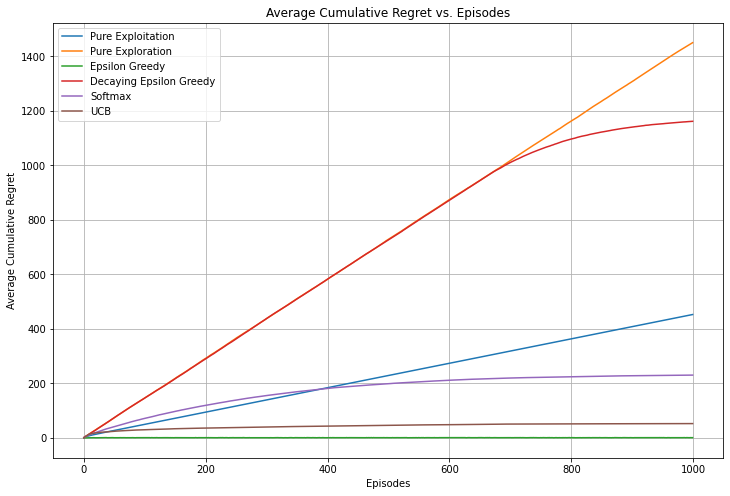

In [53]:
# Convert to NumPy arrays for easier manipulation
master_regrets = np.array(master_regrets)  # Shape: (50, 6, maxEpisodes)
master_opt_actions = np.array(master_opt_actions)

# Average over instances
avg_cumulative_regrets = np.mean(master_regrets, axis=0)
avg_opt_actions_pct = np.mean(master_opt_actions, axis=0)

plt.figure(figsize=(12, 8))
strategy_names = ["Pure Exploitation", "Pure Exploration", "Epsilon Greedy", "Decaying Epsilon Greedy", "Softmax", "UCB"]
for i, strategy_name in enumerate(strategy_names):
    plt.plot(avg_cumulative_regrets[i], label=strategy_name)

plt.xlabel('Episodes')
plt.ylabel('Average Cumulative Regret')
plt.title('Average Cumulative Regret vs. Episodes')
plt.grid()
plt.legend()
plt.show()


# % Optimal Actions vs Episodes for 10 - armed Gaussian Bandit

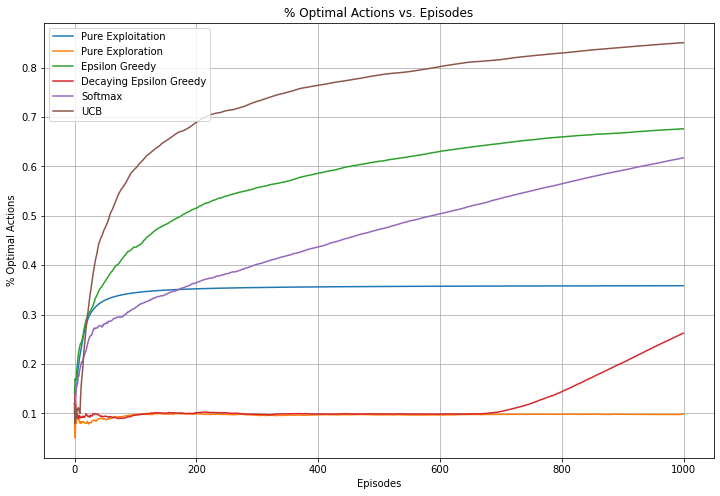

In [54]:
# Convert to NumPy arrays for easier manipulation
master_regrets = np.array(master_regrets)  # Shape: (50, 6, maxEpisodes)
master_opt_actions = np.array(master_opt_actions)  # Shape: (50, 6, maxEpisodes)

# Average over instances
avg_cumulative_regrets = np.mean(master_regrets, axis=0)  # Shape: (6, maxEpisodes)
avg_opt_actions_pct = np.mean(master_opt_actions, axis=0)  # Shape: (6, maxEpisodes)

plt.figure(figsize=(12, 8))
strategy_names = ["Pure Exploitation", "Pure Exploration", "Epsilon Greedy", "Decaying Epsilon Greedy", "Softmax", "UCB"]
for i, strategy_name in enumerate(strategy_names):
    plt.plot(avg_opt_actions_pct[i], label=strategy_name)

plt.xlabel('Episodes')
plt.ylabel('% Optimal Actions')
plt.title('% Optimal Actions vs. Episodes')
plt.grid()
plt.legend()
plt.show()


In [153]:
  # env = BernoulliBandit(alpha = 0.1, beta = 1, seed = global_seed)
  # print(env.true_rewards)

# Cumulated Reward vs Episodes for Bernoulli Bandit

In [55]:
global_seed = 123
np.random.seed(123)
bernoulli_params = np.random.rand(50,2)
maxEpisodes = 1000
numinstances = 50
initialValue = 1
finalValue = 0.1
c = 0.3
epsilon = 0.2
var = 1
decay_type = "exponential"
master_regrets, master_opt_actions = [], []

for idx, params in enumerate(bernoulli_params):
  total_rewards, total_regrets, total_opt_actions = [], [], []
  # print(params)
  global_seed = global_seed + idx
  env = BernoulliBandit(alpha = params[0], beta = params[1], seed = global_seed)

  # pure exploitation
  actions_exploit, Q_exploit, Q_est_exploit, rewards_exploit, regrets_exploit, opt_actions_exploit = pureExploitation_modified(env, maxEpisodes, global_seed = global_seed, action_ret = True)
  total_regrets.append(regrets_exploit)
  total_opt_actions.append(opt_actions_exploit)

  # pure exploration
  actions_explore, Q_explore, Q_est_explore, rewards_explore, regrets_explore, opt_actions_explore = pureExploration_modified(env, maxEpisodes, global_seed = global_seed, action_ret = True)
  total_regrets.append(regrets_explore)
  total_opt_actions.append(opt_actions_explore)

  # epsilon greedy
  actions_eps, Q_eps, Q_est_eps, rewards_eps, regrets_eps, opt_actions_eps = epsilonGreedyExploration_modified(env, maxEpisodes, epsilon, global_seed = global_seed, action_ret = True)
  total_regrets.append(regrets_eps)
  total_opt_actions.append(opt_actions_eps)

  # decaying epsilon greedy
  actions_decay_eps, Q_decay_eps, Q_est_decay_eps, rewards_decay_eps, regrets_decay_eps, opt_actions_decay_eps = decayepsilonGreedyExploration_modified(env, maxEpisodes, 100, finalValue, global_seed = global_seed, decay_type = "exponential", action_ret = True)
  total_regrets.append(regrets_decay_eps)
  total_opt_actions.append(opt_actions_decay_eps)

  # softmax exploration
  actions_sft, Q_sft, Q_est_sft, rewards_sft, regrets_sft, opt_actions_sft = softmaxExploration_modified(env, maxEpisodes, initialValue, finalValue, global_seed = global_seed, decay_type = "exponential", action_ret = True)
  total_regrets.append(regrets_sft)
  total_opt_actions.append(opt_actions_sft)

  # UCB exploration
  actions_ucb, Q_ucb, Q_est_ucb, rewards_ucb, regrets_ucb, opt_actions_ucb =  UCBExploration_modified(env, maxEpisodes, c, global_seed = global_seed, action_ret = True)
  total_regrets.append(regrets_ucb)
  total_opt_actions.append(opt_actions_ucb)

  master_regrets.append(total_regrets)
  master_opt_actions.append(total_opt_actions)

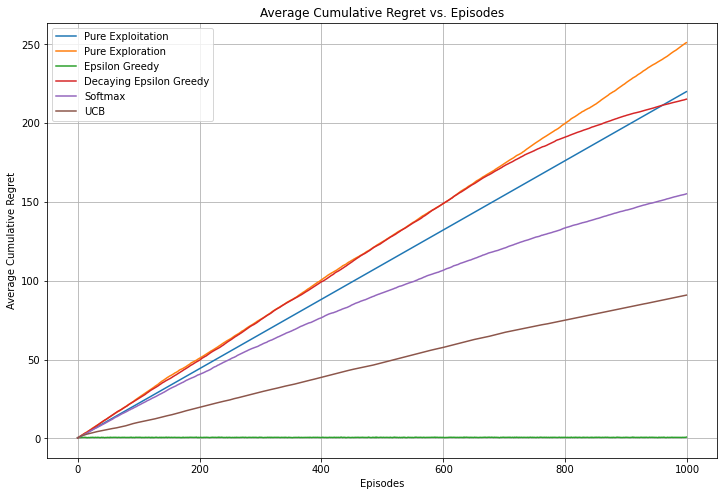

In [56]:
# Convert to NumPy arrays for easier manipulation
master_regrets = np.array(master_regrets)  # Shape: (50, 6, maxEpisodes)
master_opt_actions = np.array(master_opt_actions)

# Average over instances
avg_cumulative_regrets = np.mean(master_regrets, axis=0)
avg_opt_actions_pct = np.mean(master_opt_actions, axis=0)

plt.figure(figsize=(12, 8))
strategy_names = ["Pure Exploitation", "Pure Exploration", "Epsilon Greedy", "Decaying Epsilon Greedy", "Softmax", "UCB"]
for i, strategy_name in enumerate(strategy_names):
    plt.plot(avg_cumulative_regrets[i], label=strategy_name)

plt.xlabel('Episodes')
plt.ylabel('Average Cumulative Regret')
plt.title('Average Cumulative Regret vs. Episodes')
plt.grid()
plt.legend()
plt.show()


# % Optimal Actions vs Episodes for Bernoulli Bandit

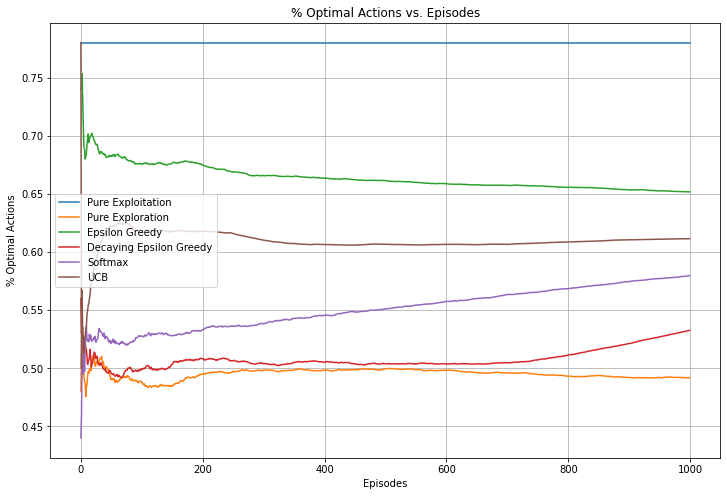

In [57]:
# Convert to NumPy arrays for easier manipulation
master_regrets = np.array(master_regrets)  # Shape: (50, 6, maxEpisodes)
master_opt_actions = np.array(master_opt_actions)  # Shape: (50, 6, maxEpisodes)

# Average over instances
avg_cumulative_regrets = np.mean(master_regrets, axis=0)  # Shape: (6, maxEpisodes)
avg_opt_actions_pct = np.mean(master_opt_actions, axis=0)  # Shape: (6, maxEpisodes)

plt.figure(figsize=(12, 8))
strategy_names = ["Pure Exploitation", "Pure Exploration", "Epsilon Greedy", "Decaying Epsilon Greedy", "Softmax", "UCB"]
for i, strategy_name in enumerate(strategy_names):
    plt.plot(avg_opt_actions_pct[i], label=strategy_name)

plt.xlabel('Episodes')
plt.ylabel('% Optimal Actions')
plt.title('% Optimal Actions vs. Episodes')
plt.grid()
plt.legend()
plt.show()
